In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [39]:
data=pd.read_csv('churn.csv')
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

1. Построить гистограмму количества звонков в техническую поддержку

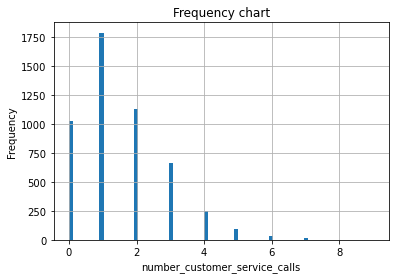

In [15]:
plt.hist(data['number_customer_service_calls'],70)
plt.grid(True)
plt.title('Frequency chart')
plt.xlabel('number_customer_service_calls')
plt.ylabel('Frequency')
plt.show()

2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)

In [129]:
data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes'] + data['total_intl_minutes']

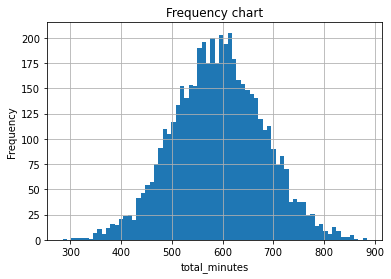

In [130]:
plt.hist(data['total_minutes'],70)
plt.grid(True)
plt.title('Frequency chart')
plt.xlabel('total_minutes')
plt.ylabel('Frequency')
plt.show()

3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [135]:
def pcc(x, y):
   # Normalise X and Y
   x -= x.mean(0)
   y -= y.mean(0)
   # Standardise X and Y
   x /= x.std(0)
   y /= y.std(0)
   # Compute mean product
   return np.mean(x*y)

In [136]:
pcc(x, y)

-0.01140562924527604

Проверим:

Коэффициент корреляции Пирсона: -0.011407910827441414


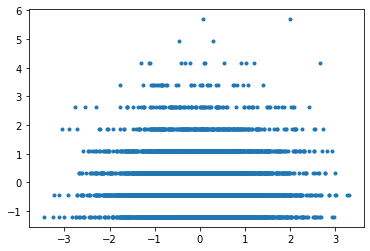

In [137]:
x = data['total_minutes']
y = data['number_customer_service_calls']
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

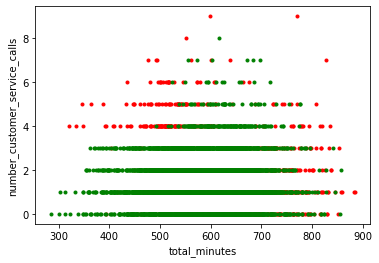

In [36]:
#клиент покинул компанию
x = data[(data.churned == True)]['total_minutes']
y = data[(data.churned == True)]['number_customer_service_calls']
plt.scatter(x, y, marker='.',color='r')
plt.xlabel('total_minutes')
plt.ylabel('number_customer_service_calls')
#клиент в компании
x = data[(data.churned == False)]['total_minutes']
y = data[(data.churned == False)]['number_customer_service_calls']
plt.scatter(x, y, marker='.',color='g')
plt.xlabel('total_minutes')
plt.ylabel('number_customer_service_calls')
plt.show()

Чем больше человек обращался клиент в техподдержку, тем больше вероятность, что он откажется от компании. Также видим, что часть клиентов, у которых общее количество минут превышает 750, покидают компанию

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [32]:
top_max = data.groupby('phone_number')[['total_minutes']].sum()\
    .sort_values('total_minutes', ascending=False).head(5)
top_max

,total_minutes
phone_number,
345-9140,885.0
352-6976,882.2
345-3787,860.2
410-3888,858.2
370-4667,857.4


In [34]:
top_min = data.groupby('phone_number')[['total_minutes']].sum()\
    .sort_values('total_minutes', ascending=False).tail(5)
top_min

,total_minutes
phone_number,
375-8934,313.3
405-9233,313.0
362-8044,303.2
380-5246,301.5
331-3174,284.3


6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [66]:
data['avg_day_cost'] = data['total_day_charge'] / data['total_day_minutes']
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,avg_day_cost
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0.170011
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0.169988
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0.170008
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0.170007
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0.170006


In [111]:
data.groupby(["state"])["churned"].agg([np.mean]).sort_values(by="mean", ascending=False).T

state,CA,NJ,WA,TX,MT,MD,NV,ME,KS,OK,...,VT,WY,LA,IL,WI,RI,AK,NE,HI,VA
mean,0.269231,0.25,0.244898,0.224138,0.212121,0.205882,0.188889,0.184466,0.181818,0.177778,...,0.09901,0.095652,0.085366,0.079545,0.075472,0.070707,0.069444,0.068182,0.05814,0.050847


В Калифорнии и Нью-Джерси большой отток (25%), На Гавайях 5%

In [112]:
data.groupby(["state"])["avg_day_cost"].agg([np.mean]).sort_values(by="mean", ascending=False).T

state,OR,DC,IA,OH,KY,SC,MO,ND,ME,VT,...,FL,SD,NJ,MT,HI,MA,IN,WI,NC,OK
mean,0.170009,0.170009,0.170008,0.170008,0.170008,0.170008,0.170008,0.170007,0.170007,0.170006,...,0.170001,0.170001,0.170001,0.170001,0.17,0.17,0.17,0.169999,0.169996,0.169992


Везде примерно одинаковая стоимость минуты

7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [38]:
pd.get_dummies(data, columns=["state"]).head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [71]:
df = data[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',           
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]
df.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [77]:
# выделяем churned как целевую переменную
X, y = data[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',           
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
    'total_intl_charge', 'number_customer_service_calls']], data['churned']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
X_train.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
4997,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
2138,0,178.3,102,30.31,235.0,120,19.98,239.7,119,10.79,10.9,1,2.94,3
3437,0,87.6,89,14.89,172.3,133,14.65,153.4,88,6.90,8.0,4,2.16,1
461,0,147.9,109,25.14,228.4,117,19.41,299.7,90,13.49,9.6,9,2.59,3
2566,0,168.6,92,28.66,187.7,107,15.95,216.5,95,9.74,14.4,8,3.89,2


In [80]:
y_train.head()

4997    False
2138    False
3437    False
461     False
2566    False
Name: churned, dtype: bool

9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas.

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

Обучение:

In [89]:
logistic = LogisticRegression()

In [90]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [91]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
svc_model=SVC()

In [93]:
svc_model.fit(X_train, y_train)

SVC()

Точность:

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [95]:
accuracy_score(y_test, logistic.predict(X_test))

0.851

In [96]:
precision_score(y_test, logistic.predict(X_test))

0.7222222222222222

In [97]:
recall_score(y_test, logistic.predict(X_test))

0.08280254777070063

In [98]:
f1_score(y_test, logistic.predict(X_test))

0.14857142857142858

In [99]:
accuracy_score(y_test, tree.predict(X_test))

0.862

In [100]:
precision_score(y_test, tree.predict(X_test))

0.558282208588957

In [101]:
recall_score(y_test, tree.predict(X_test))

0.5796178343949044

In [102]:
f1_score(y_test, tree.predict(X_test))

0.56875

Метрики SCV

In [103]:
accuracy_score(y_test, svc_model.predict(X_test))

0.902

In [104]:
precision_score(y_test, svc_model.predict(X_test))

0.9538461538461539

In [105]:
recall_score(y_test, svc_model.predict(X_test))

0.39490445859872614

In [106]:
f1_score(y_test, svc_model.predict(X_test))

0.5585585585585586